# CLUSTERING ANALYSIS USING CREDIT CARD DATA

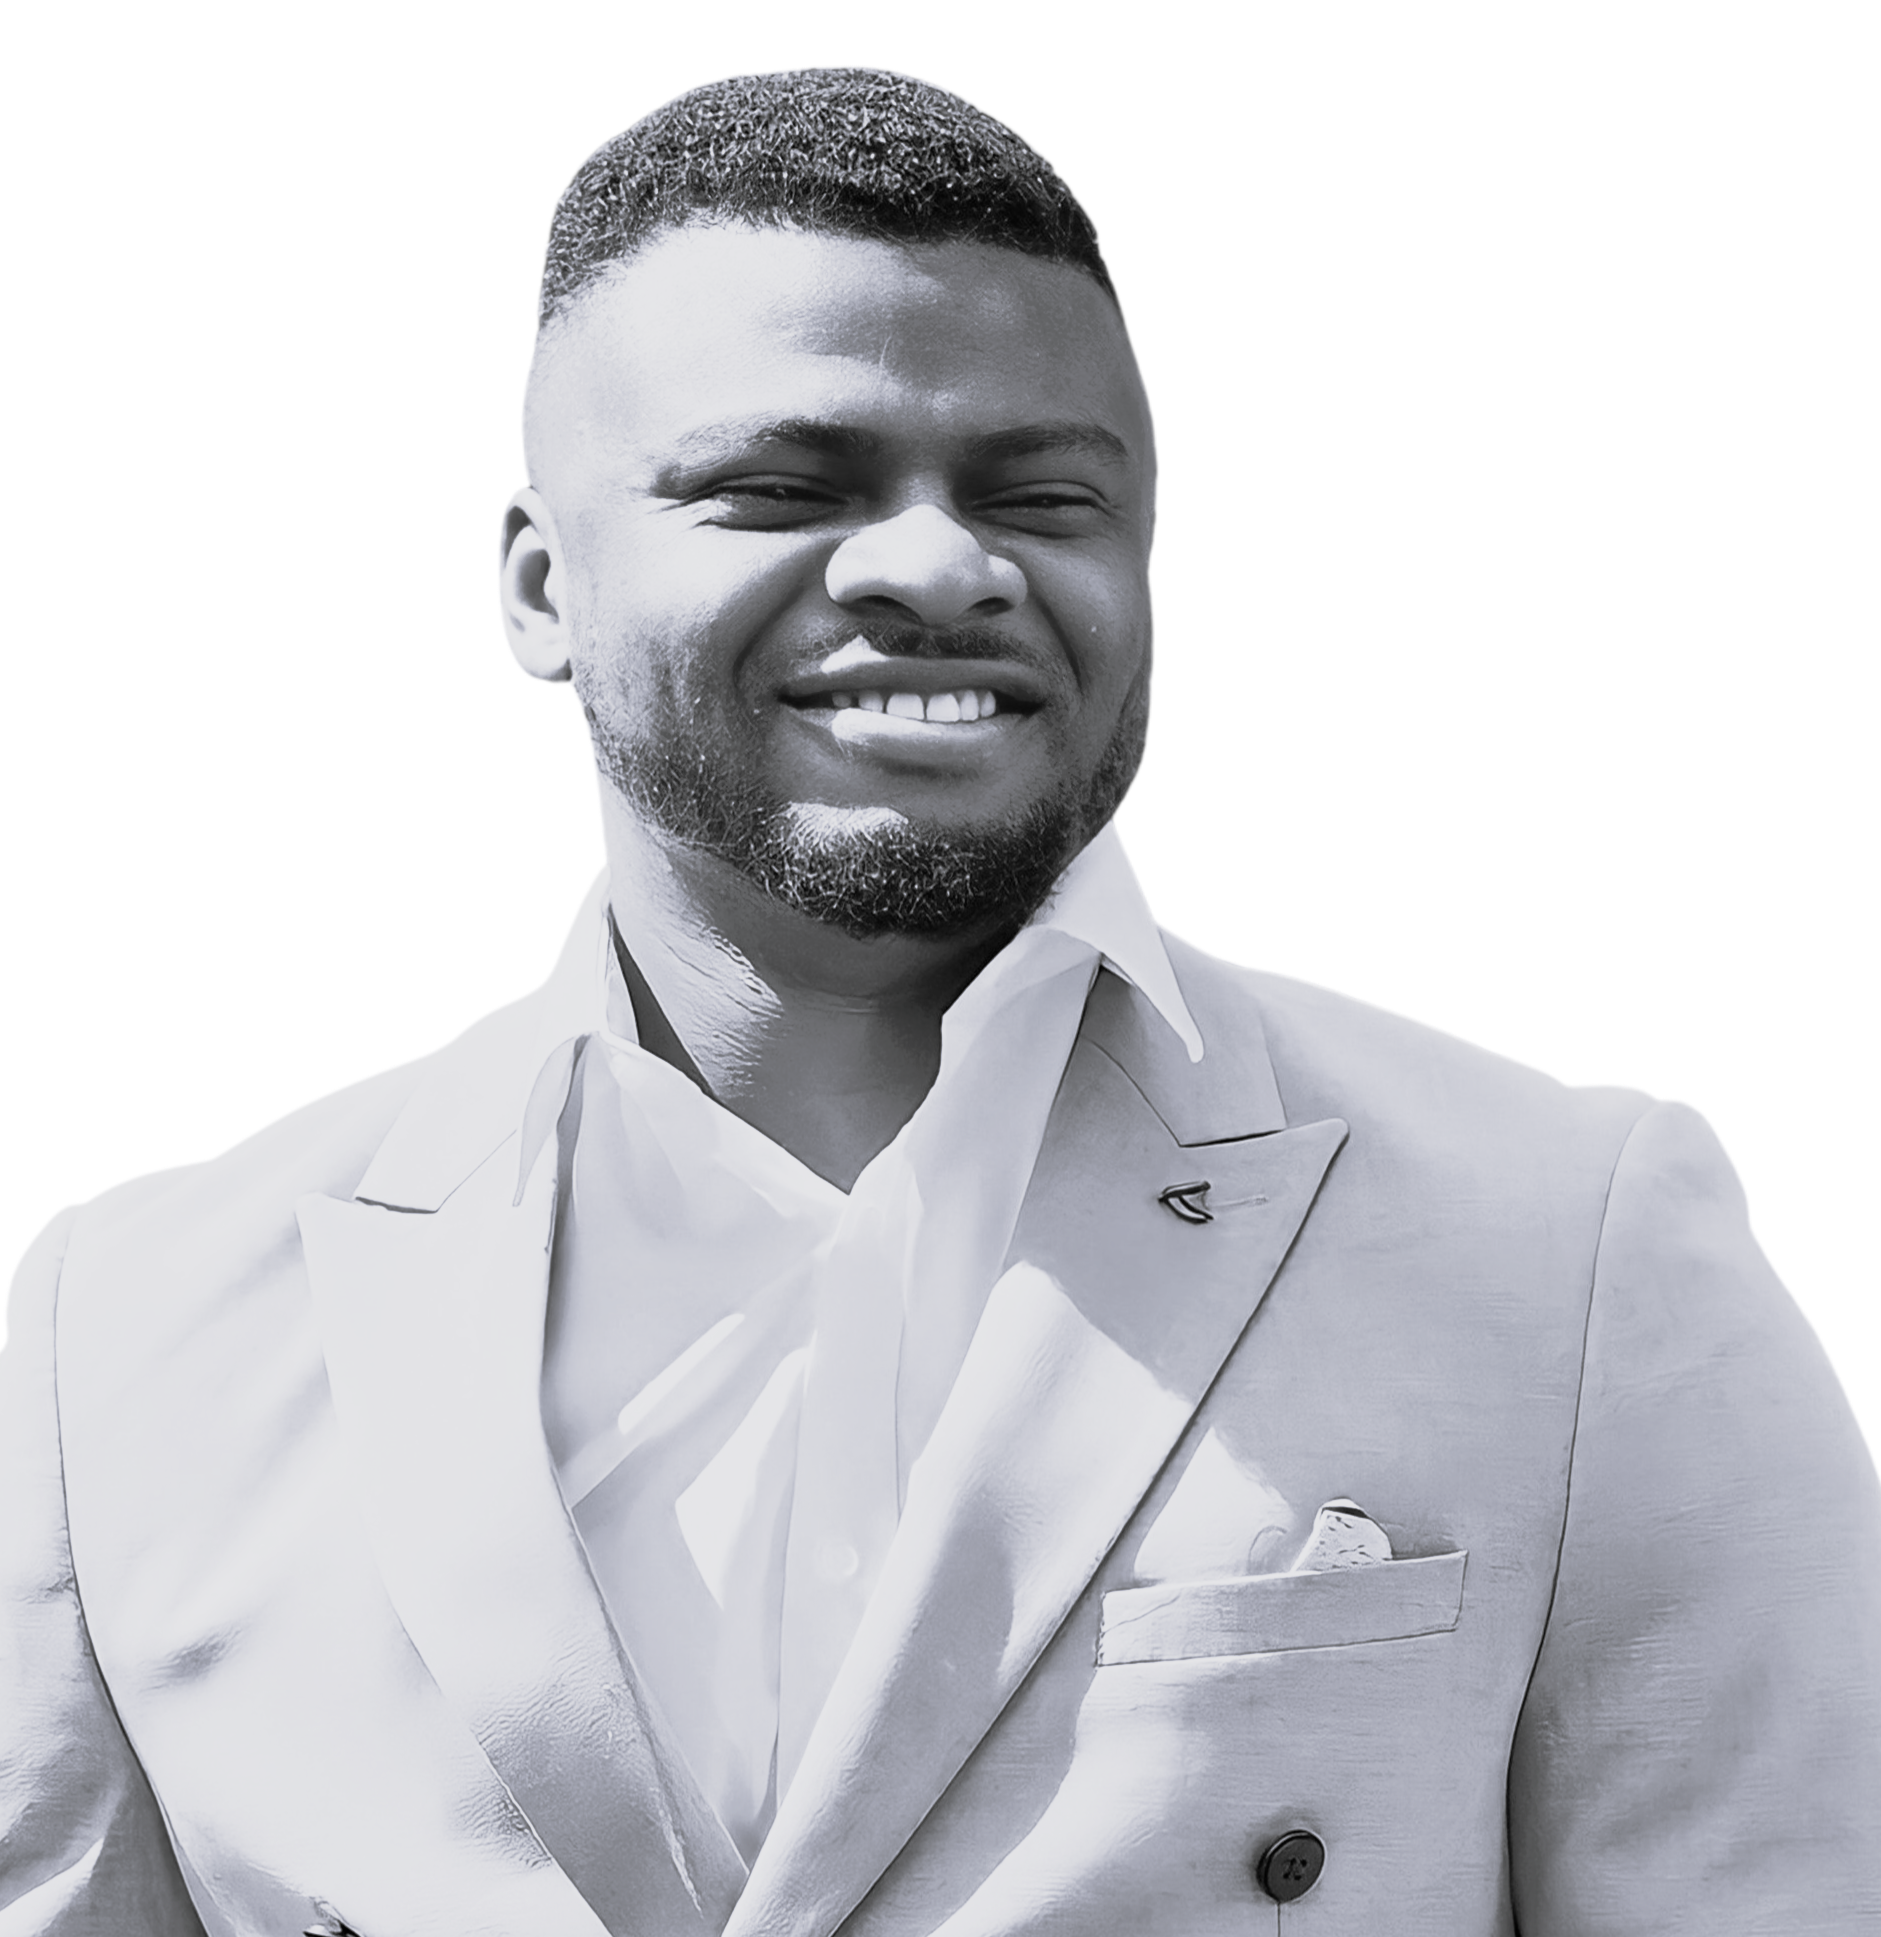

In [33]:
from PIL import Image

im = Image.open("C:\\Users\TOJMARK LTD\\DATA SCIENCE PROJECT\\Apple stock prediction project\\MYIMAGE.png")
display(im)

Hi, I'm a data enthusiast with a knack for making sense of numbers. I thrive on turning data into practical insights that drive business decisions. My background in marketing gives me an edge in understanding customer behavior. I love experimenting with data, using statistical tools and machine learning to find hidden patterns. My goal is to become a data scientist, supercharging my data skills. My journey is guided by a passion for ethical data practices and a strong belief in data's power to transform businesses.

# INTRODUCTION

In this project, I will perform clustering analysis on a dataset containing information about credit card customers. The dataset consists of 8,950 entries, each representing a customer, and includes 18 columns with various features such as balance, purchase history, credit limits, and more.

My objective is to employ clustering techniques to uncover hidden patterns and segment customers based on their credit card usage behavior. By grouping customers with similar characteristics together, I aim to provide valuable insights for decision-making in the financial industry.

Through exploratory data analysis (EDA), data preprocessing, and clustering algorithms like K-means and hierarchical clustering, I will identify distinct customer segments. These segments can help financial institutions tailor their services and marketing strategies to meet the specific needs of different customer groups.

By the end of this analysis, I intend to provide a clear understanding of how customers are distributed within these clusters and offer insights into the characteristics that define each group. This information can be instrumental in making data-driven decisions, such as optimizing credit offerings, managing risk, and enhancing customer experiences.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("C:\\Users\\TOJMARK LTD\\CREDITCARDgeneral.csv")
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

# DATA EXPLORATION

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.notnull().sum()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [6]:
#Let check the distribution of the 'TENURE' column
print(data['TENURE'].value_counts())

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64


In [7]:
#Let calculate the average balance for customers who made at least one purchase:
avg_balance_with_purchases = data[data['PURCHASES'] > 0]['BALANCE'].mean()
print("Average balance for customers with purchases:", avg_balance_with_purchases)

Average balance for customers with purchases: 1390.818260724732


In [8]:
#the customers with the highest and lowest credit limits
max_credit_limit = data['CREDIT_LIMIT'].max()
min_credit_limit = data['CREDIT_LIMIT'].min()
print("Customer with the highest credit limit:", data[data['CREDIT_LIMIT'] == max_credit_limit]['CUST_ID'].values[0])
print("Customer with the lowest credit limit:", data[data['CREDIT_LIMIT'] == min_credit_limit]['CUST_ID'].values[0])

Customer with the highest credit limit: C15041
Customer with the lowest credit limit: C17140


In [9]:
#the correlation between 'BALANCE' and 'PAYMENTS'
avg_full_payment = data['PRC_FULL_PAYMENT'].mean()
avg_full_payment

0.15371464849162012

In [10]:
#The proportion of customers who made one-off purchases versus installments
oneoff_vs_installments = data['ONEOFF_PURCHASES'].sum() / data['INSTALLMENTS_PURCHASES'].sum()
oneoff_vs_installments

1.4412162538176716

In [11]:
# the average number of purchases per transaction
avg_purchases_per_transaction = data['PURCHASES'].sum() / data['PURCHASES_TRX'].sum()
avg_purchases_per_transaction

68.19961003547203

In [12]:
#let check if there are any missing values in the 'MINIMUM_PAYMENTS' column
missing_values = data['MINIMUM_PAYMENTS'].isnull().sum()
missing_values

313

In [13]:
# Remove rows with null values
data = data.dropna()

# Check the number of rows after removing null values
len(data)

8636

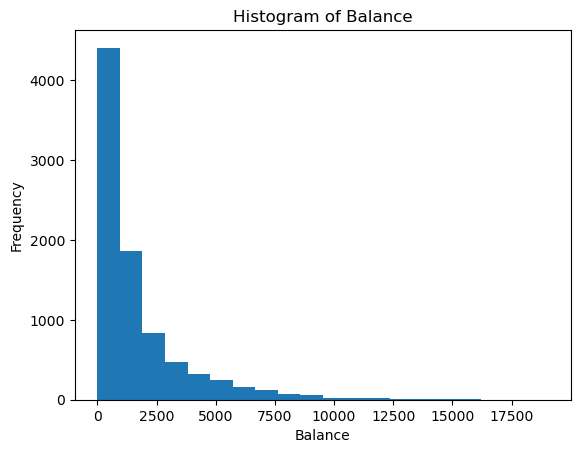

In [14]:
import matplotlib.pyplot as plt

plt.hist(data['BALANCE'], bins=20)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')
plt.show()

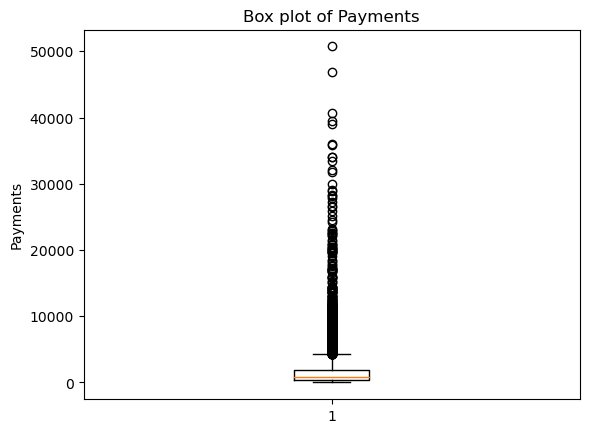

In [15]:
plt.boxplot(data['PAYMENTS'])
plt.ylabel('Payments')
plt.title('Box plot of Payments')
plt.show()

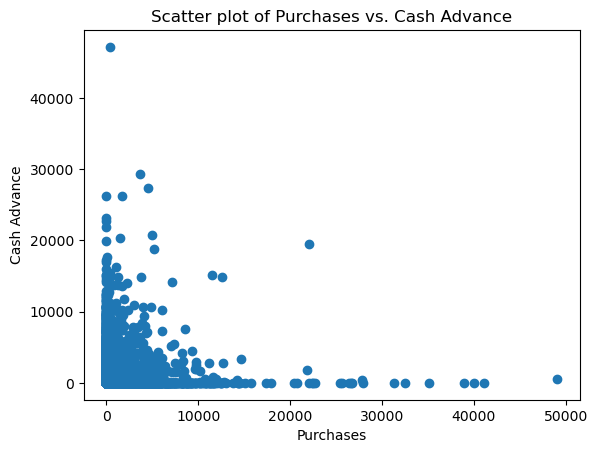

In [16]:
plt.scatter(data['PURCHASES'], data['CASH_ADVANCE'])
plt.xlabel('Purchases')
plt.ylabel('Cash Advance')
plt.title('Scatter plot of Purchases vs. Cash Advance')
plt.show()

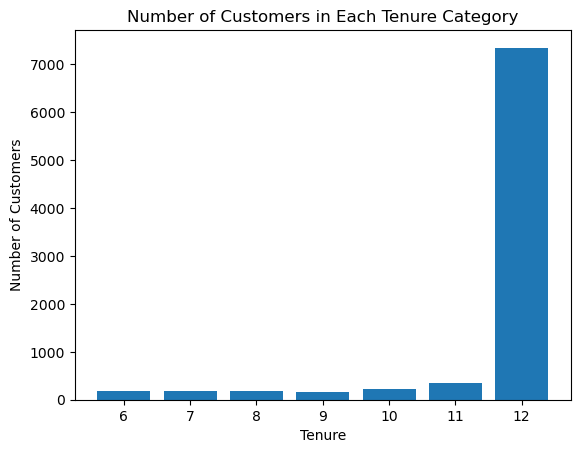

In [17]:
tenure_counts = data['TENURE'].value_counts()
plt.bar(tenure_counts.index, tenure_counts.values)
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Tenure Category')
plt.show()

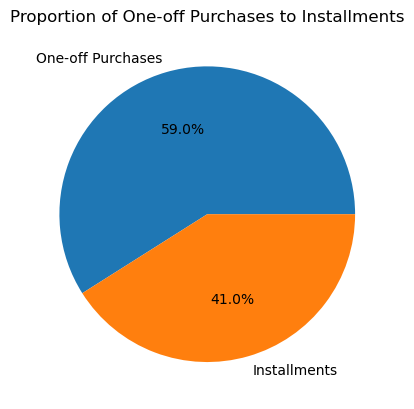

In [18]:
oneoff_sum = data['ONEOFF_PURCHASES'].sum()
installments_sum = data['INSTALLMENTS_PURCHASES'].sum()
proportions = [oneoff_sum, installments_sum]
labels = ['One-off Purchases', 'Installments']
plt.pie(proportions, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of One-off Purchases to Installments')
plt.show()

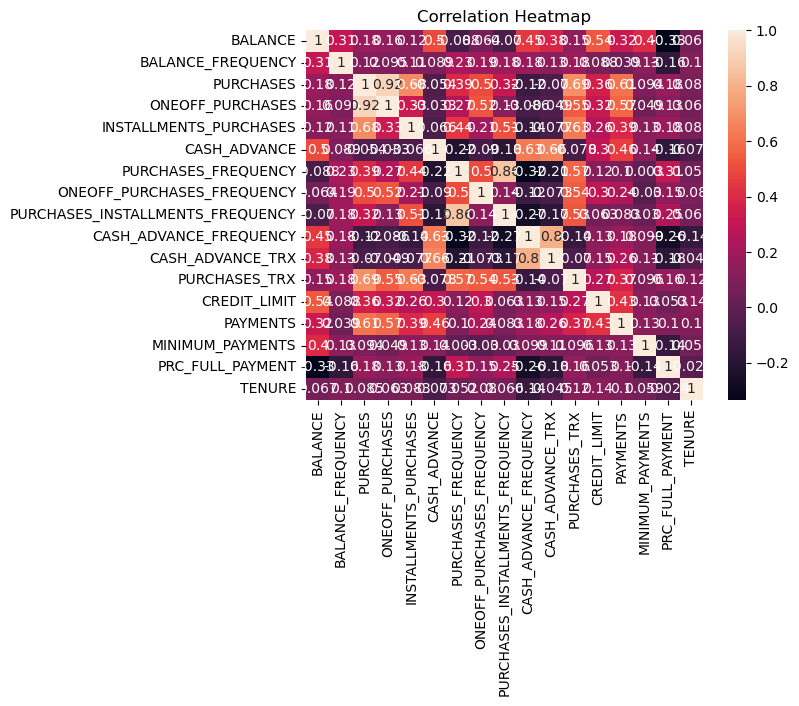

In [19]:
import seaborn as sns

data_numeric = data.drop(columns=['CUST_ID'])

# Remove rows with null values
data_cleaned = data_numeric.dropna()

# Compute correlation matrix
correlation_matrix = data_cleaned.corr()

# Create the correlation heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

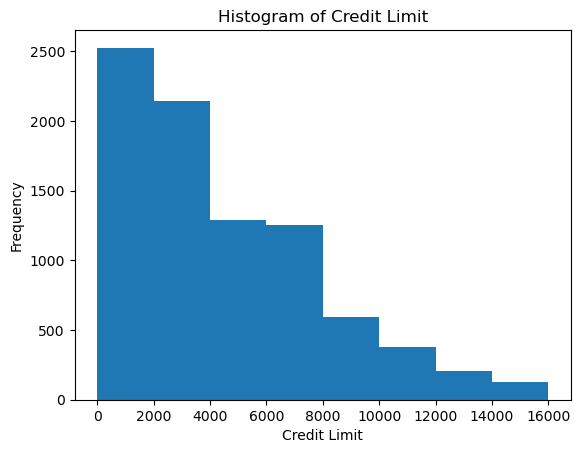

In [20]:
plt.hist(data['CREDIT_LIMIT'], bins=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000])
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.title('Histogram of Credit Limit')
plt.show()

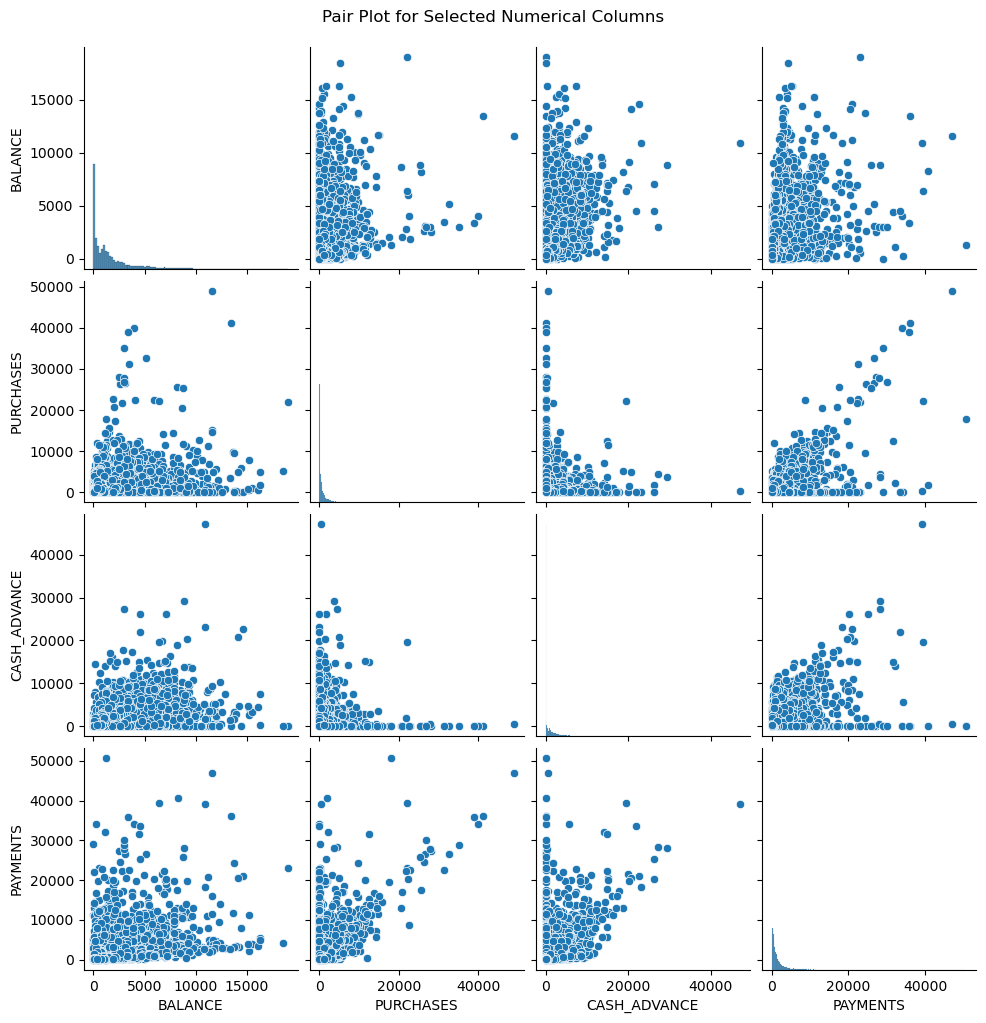

In [21]:
selected_columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']
sns.pairplot(data[selected_columns])
plt.suptitle('Pair Plot for Selected Numerical Columns', y=1.02)
plt.show()

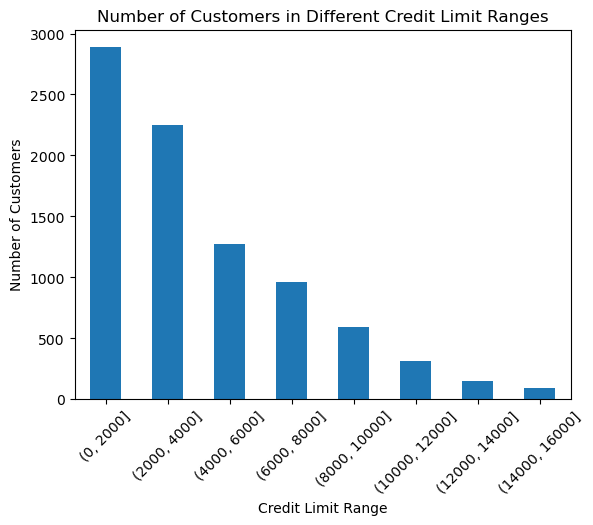

In [22]:
credit_limit_bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
data['CREDIT_LIMIT_BIN'] = pd.cut(data['CREDIT_LIMIT'], bins=credit_limit_bins)
credit_limit_counts = data['CREDIT_LIMIT_BIN'].value_counts().sort_index()
credit_limit_counts.plot(kind='bar')
plt.xlabel('Credit Limit Range')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Different Credit Limit Ranges')
plt.xticks(rotation=45)
plt.show()

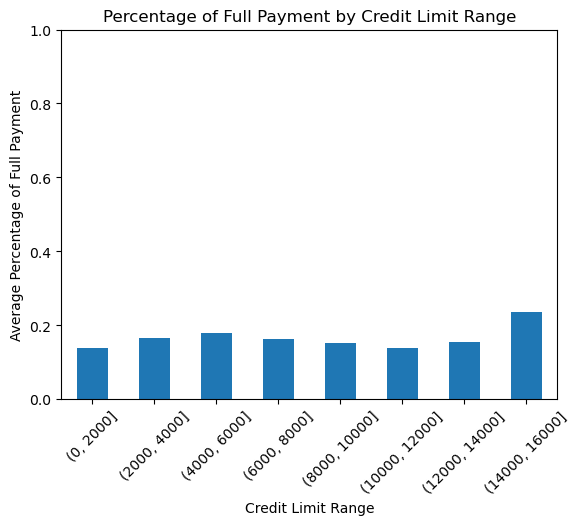

In [23]:
avg_full_payment_by_limit = data.groupby('CREDIT_LIMIT_BIN')['PRC_FULL_PAYMENT'].mean()
avg_full_payment_by_limit.plot(kind='bar')
plt.xlabel('Credit Limit Range')
plt.ylabel('Average Percentage of Full Payment')
plt.title('Percentage of Full Payment by Credit Limit Range')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [24]:
# Drop the 'CUST_ID' and 'CREDIT_LIMIT' columns
model_data = data.drop(columns=['CUST_ID', 'CREDIT_LIMIT_BIN'])
model_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
4      678.334763        244.791237          0.000000      12  
5     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8943    58.644883         43.473717          0.000000       6  
8945   325.594462         48.886365          0.500000       6  
8947    81

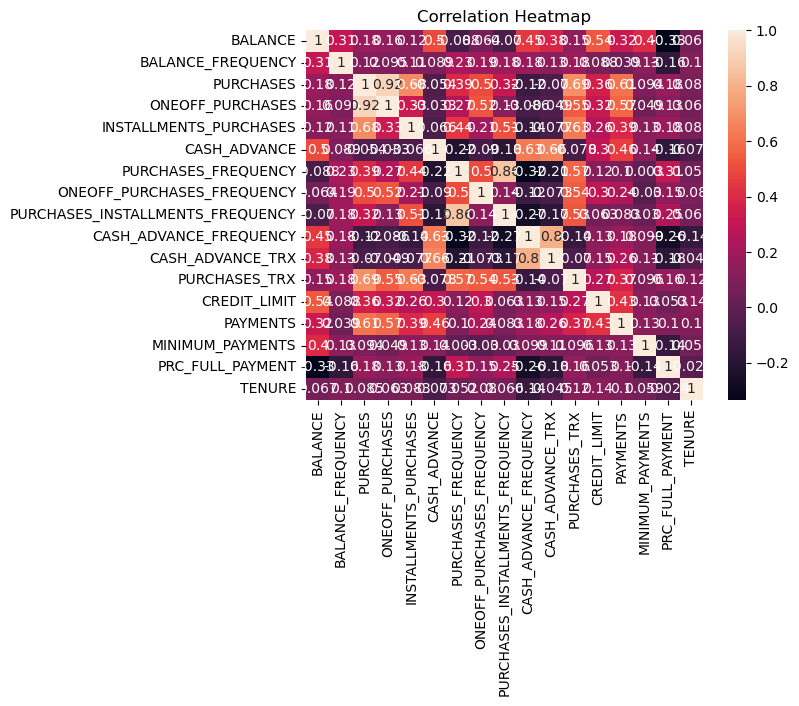

In [25]:
# Compute correlation matrix
model_data.dropna()
model_data = model_data.apply(pd.to_numeric)

correlation_matrix = model_data.corr()
# Create the correlation heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13

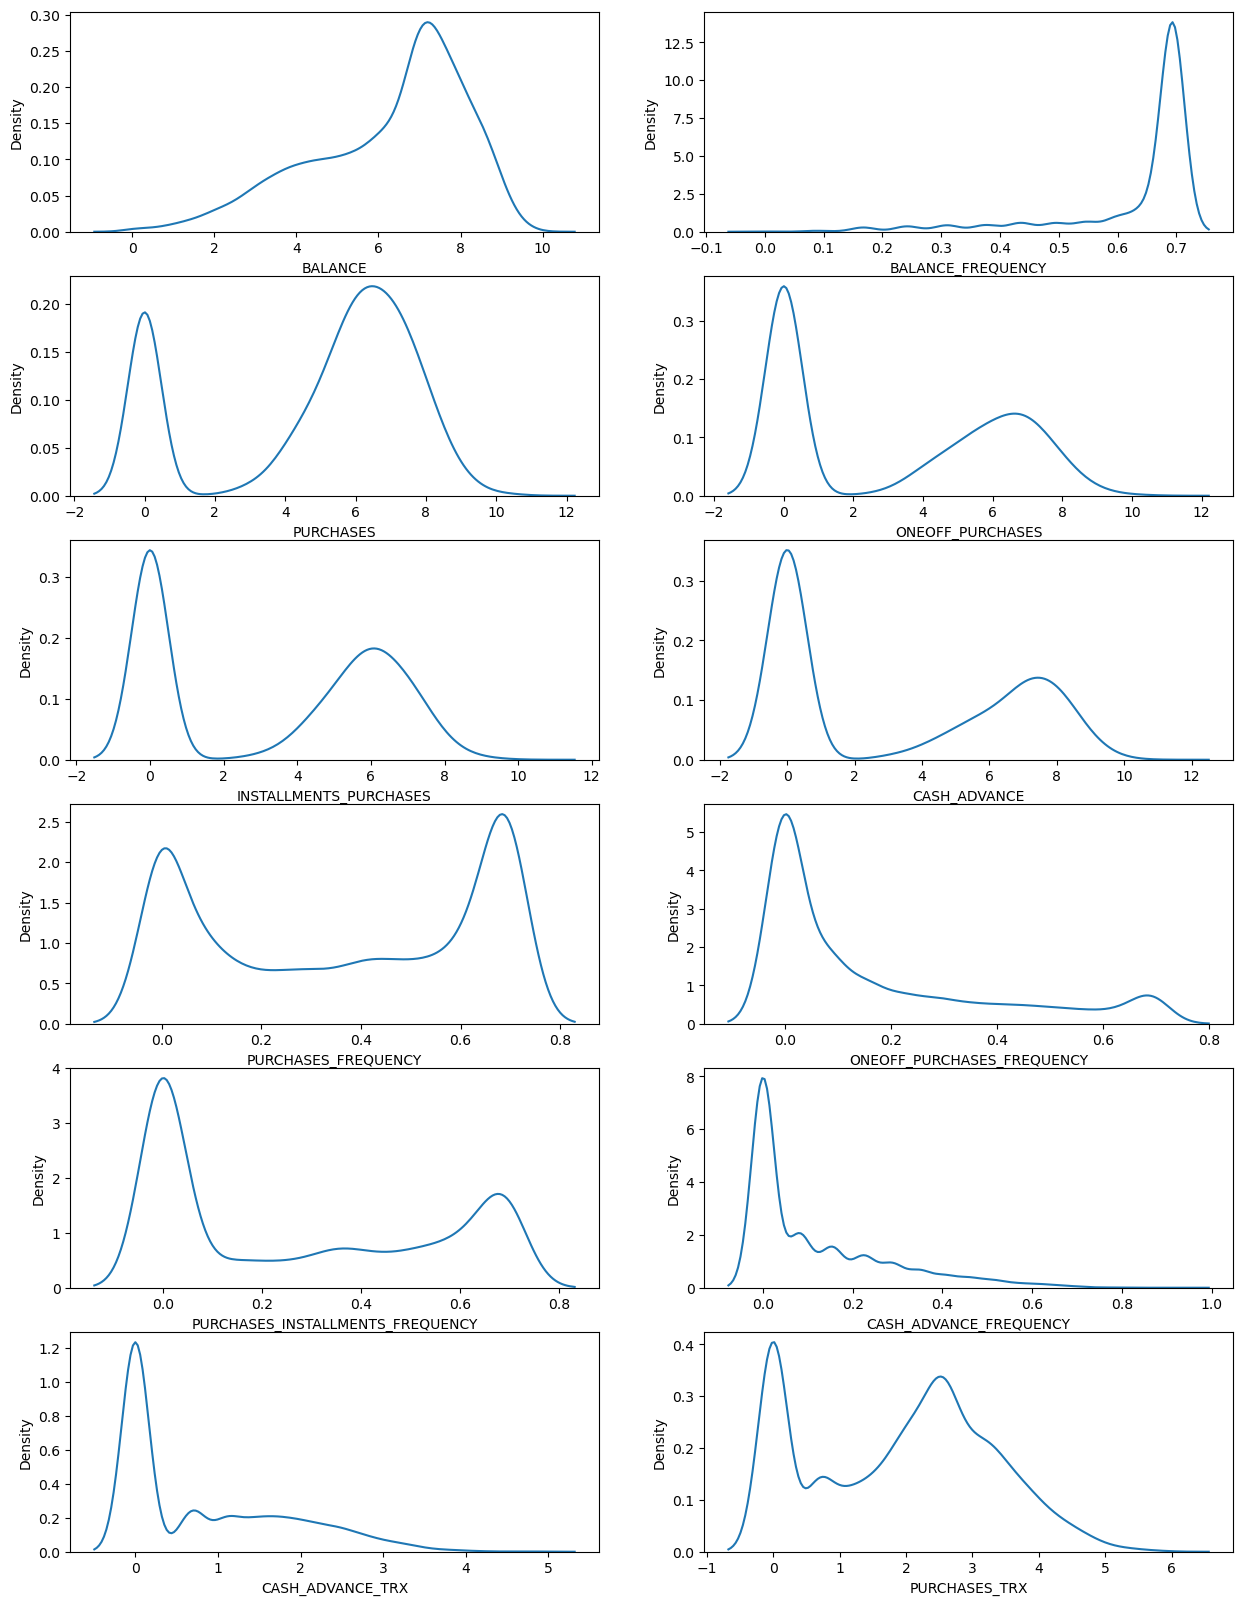

In [26]:
cols = model_data.columns.tolist()
for col in cols:
    model_data[col] = np.log(1 + model_data[col])
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(model_data[col], ax=ax)
plt.show()

# Principal Component Analysis

In [27]:
# Standardize the data before applying PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(model_data)

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)  # You can choose the number of components you want to keep
data_pca = pca.fit_transform(data_scaled)

# Determine the No Of Clustering

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

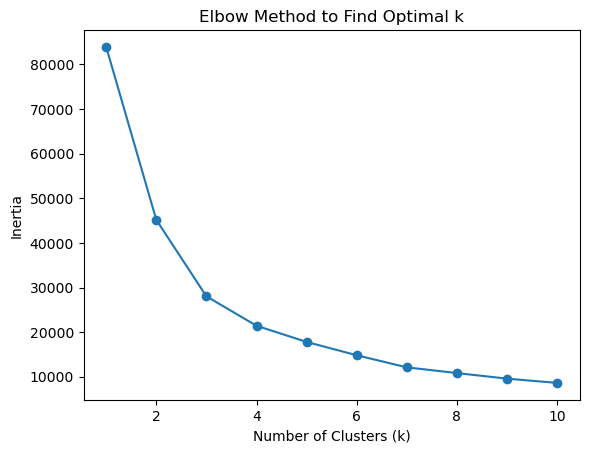

In [28]:
 #Determine the optimal number of clusters (k) using the elbow method
inertia = []
for k in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

I selected 2 as my number of K

# K-MEANS CLUSTERING ANALYSIS

In [29]:
# Apply k-means clustering with k=2
K = 2
kmeans = KMeans(n_clusters=K, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Add the cluster labels to the DataFrame
model_data['Cluster'] = clusters

# Print the first few rows of the DataFrame with cluster labels
model_data.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  3.735304           0.597837   4.568506          0.000000   
1  8.071989           0.646627   0.000000          0.000000   
2  7.822504           0.693147   6.651791          6.651791   
4  6.707735           0.693147   2.833213          2.833213   
5  7.501540           0.693147   7.196147          0.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.568506      0.000000             0.154151   
1                0.000000      8.770896             0.000000   
2                0.000000      0.000000             0.693147   
4                0.000000      0.000000             0.080042   
5                7.196147      0.000000             0.510826   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.080042   
1                    0.000000                          0.000000   
2                    0.693147                          0.000000   
4                    0.080042                          0.000000   
5                    0.000000                          0.459532   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000          0.000000       1.098612      6.908755   
1                0.223144          1.609438       0.000000      8.853808   
2                0.000000          0.000000       2.564949      8.922792   
4                0.000000          0.000000       0.693147      7.090910   
5                0.000000          0.000000       2.197225      7.496097   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  Cluster  
0  5.312231          4.945277          0.000000  2.564949        1  
1  8.319725          6.978531          0.200671  2.564949        0  
2  6.434654          6.442994          0.000000  2.564949        1  
4  6.521114          5.504483          0.000000  2.564949        0  
5  7.244983          7.786654          0.000000  2.564949        1

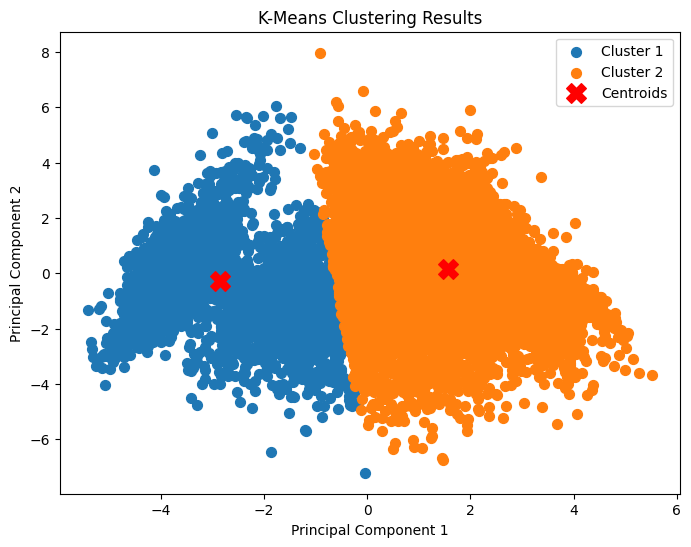

In [40]:
# Visualize the clusters using scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[model_data['Cluster'] == 0][:, 0], data_pca[model_data['Cluster'] == 0][:, 1], label='Cluster 1', s=50)
plt.scatter(data_pca[model_data['Cluster'] == 1][:, 0], data_pca[model_data['Cluster'] == 1][:, 1], label='Cluster 2', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='red', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

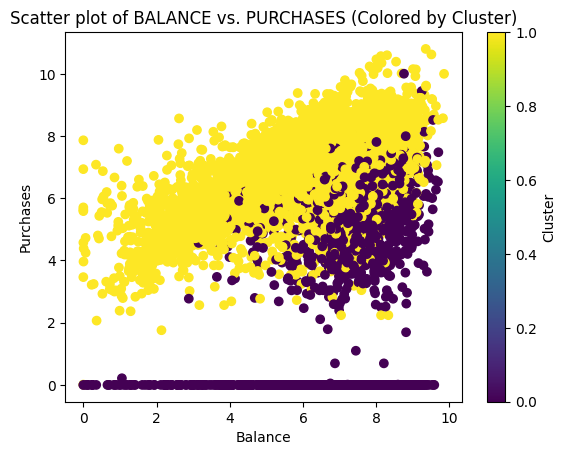

In [41]:
plt.scatter(model_data['BALANCE'], model_data['PURCHASES'], c=model_data['Cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.title('Scatter plot of BALANCE vs. PURCHASES (Colored by Cluster)')
plt.colorbar(label='Cluster')
plt.show()

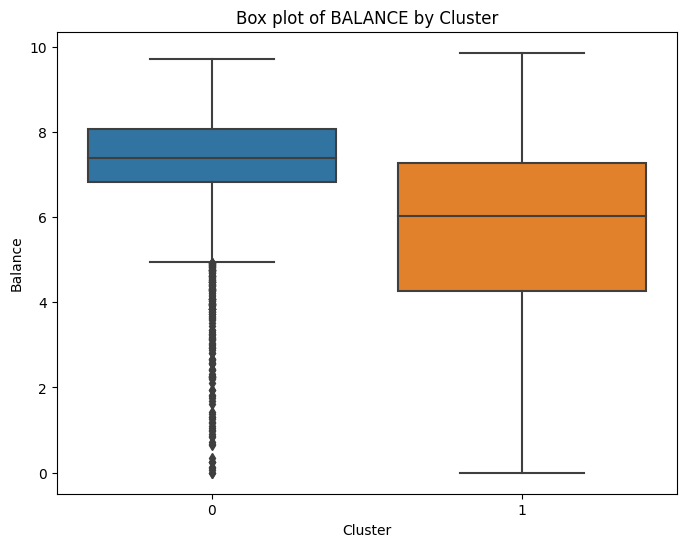

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=model_data['Cluster'], y=model_data['BALANCE'])
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.title('Box plot of BALANCE by Cluster')
plt.show()

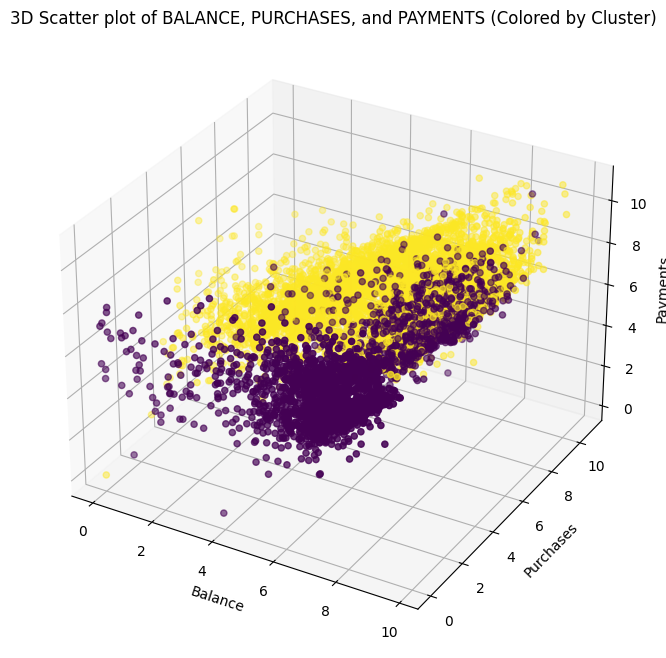

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(model_data['BALANCE'], model_data['PURCHASES'], model_data['PAYMENTS'], c=model_data['Cluster'], cmap='viridis')
ax.set_xlabel('Balance')
ax.set_ylabel('Purchases')
ax.set_zlabel('Payments')
ax.set_title('3D Scatter plot of BALANCE, PURCHASES, and PAYMENTS (Colored by Cluster)')
plt.show()

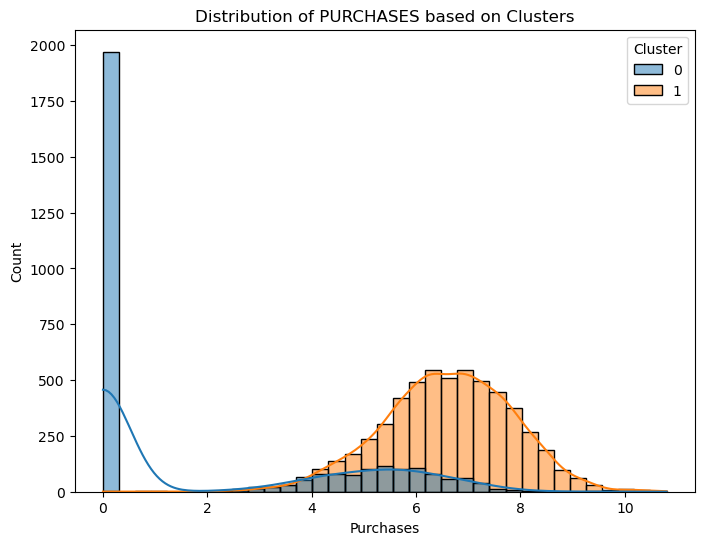

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data=model_data, x='PURCHASES', hue='Cluster', kde=True)
plt.xlabel('Purchases')
plt.title('Distribution of PURCHASES based on Clusters')
plt.show()

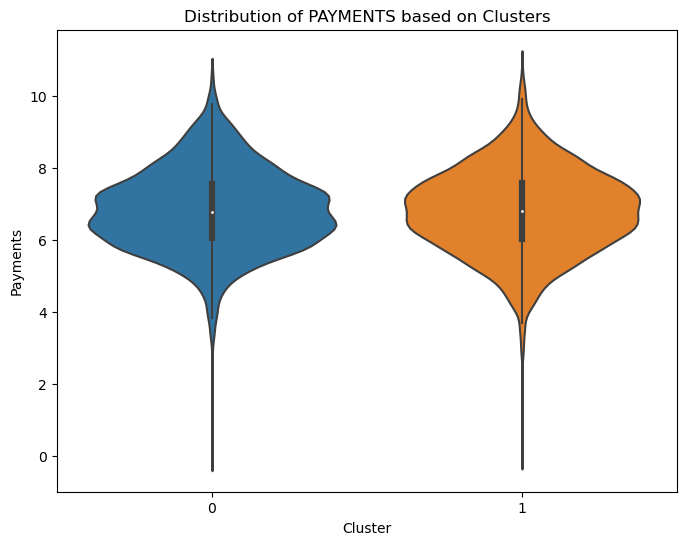

In [32]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=model_data, x='Cluster', y='PAYMENTS')
plt.xlabel('Cluster')
plt.ylabel('Payments')
plt.title('Distribution of PAYMENTS based on Clusters')
plt.show()

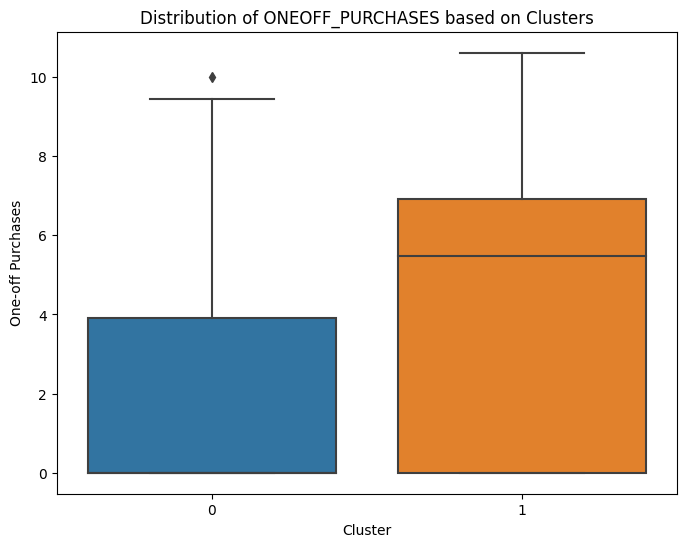

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=model_data, x='Cluster', y='ONEOFF_PURCHASES')
plt.xlabel('Cluster')
plt.ylabel('One-off Purchases')
plt.title('Distribution of ONEOFF_PURCHASES based on Clusters')
plt.show()


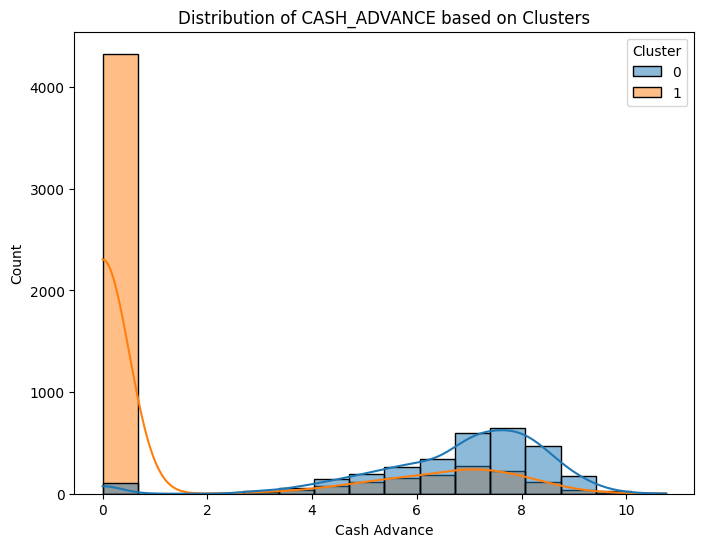

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(data=model_data, x='CASH_ADVANCE', hue='Cluster', kde=True)
plt.xlabel('Cash Advance')
plt.title('Distribution of CASH_ADVANCE based on Clusters')
plt.show()

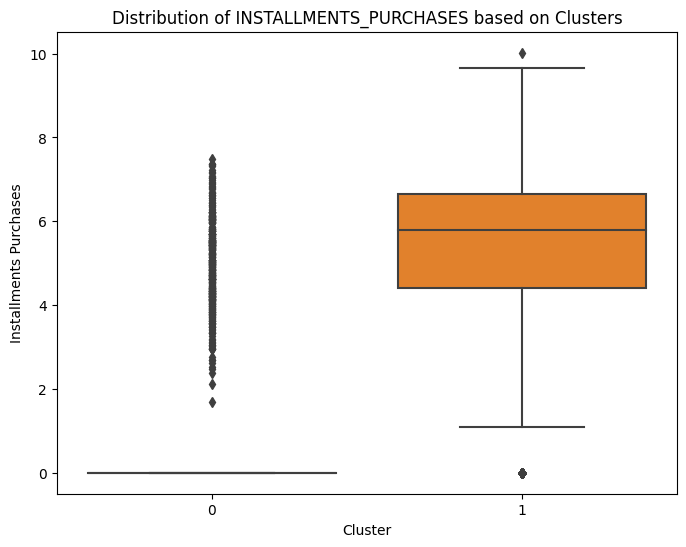

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=model_data, x='Cluster', y='INSTALLMENTS_PURCHASES')
plt.xlabel('Cluster')
plt.ylabel('Installments Purchases')
plt.title('Distribution of INSTALLMENTS_PURCHASES based on Clusters')
plt.show()

# Thank You